Plotting deflection graph for point load at any point on the beam
Enter length of the beam :1
Enter load position : 0.5
Enter load amount :10
Enter position of support 1 :0
Enter position of support 2 :1
Enter the young's modulus :1
Enter moment of Inertia of the material :1
5.0
5.0


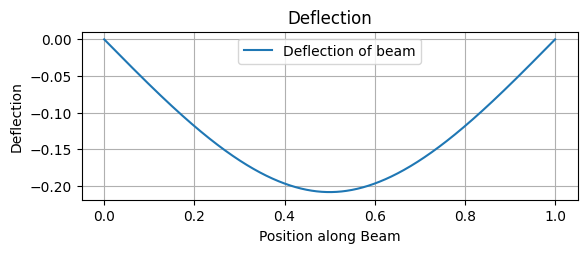

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from sympy import symbols, integrate

print("Plotting deflection graph for point load at any point on the beam")

length = float(input("Enter length of the beam :"))
pos = float(input("Enter load position : "))
wei = float(input("Enter load amount :"))
s1 = float(input("Enter position of support 1 :"))
s2 = float(input("Enter position of support 2 :"))
E = float(input("Enter the young's modulus :"))
I = float(input("Enter moment of Inertia of the material :"))
# x= float(input('Enter x '))
def sing1(x, y, pow):
    if (y - x) > 0:
        if pow >= 1:
            return ((y - x) ** pow) / pow
        else:
            return 1
    else:
        return 0

def sing(x, y, pow):
    if (y - x) > 0:
        return (y - x) ** pow
    else:
        return 0

def pointf(x):
    # First, we find a and b
    a = pos - s1
    b = s2 - pos
    l = a + b
    r1 = wei * b / l
    r2 = wei - r1

    # Calculate shear force and moment based on the position x
    if x < s1 or x > s2:
        v = 0
        m = 0
        deflection = 0
    elif x == s1:
        v = -r1
        m = 0
        deflection = 0

    # elif x == s2:
    #     deflection = 0
    #     v= 0
    #     m=0
    else:
        v = -r1 * sing(s1, x, 0) + wei * sing(pos, x, 0)
        m = r1 * sing(s1, x, 1) - wei * sing(pos, x, 1)
        d = (wei * sing1(pos, l, 3)) / (2.0)
        e = (r1 * sing1(s1, l, 3)) / (2.0)
        c1 = (d - e)*l
        deflection = ((r1 * sing1(s1, x, 3)) / (2.0 * I*E)) - ((wei * sing1(pos, x, 3)) / (2.0 * I*E)) + ((c1 * x))/(I*E)
        # deflection_s1 = ((r1 * sing1(s1, s1, 3)) / (6.0 * E * I)) - ((wei * sing1(pos, s1, 3)) / (6.0 * E * I)) + ((c1 * s1))/E
        # deflection = ((r1 * sing1(s1, x, 3)) / (6.0 * E * I)) * ((x - pos) ** 3) - ((wei * sing1(pos, x, 3)) / (6.0 * E * I)) * ((x - s1) ** 3) + c1 * (x - s1) + deflection_s1


    return v, m, r1, r2, deflection

values = np.linspace(0, length, 1000)
shearf1 = []
momentm1 = []
deflection1 = []
r11 = 0
r21 = 0

for x in values:
    v, m, r11, r21, deflection = pointf(x)
    shearf1.append(v)
    momentm1.append(m)
    deflection1.append(deflection)

# Plot deflection
plt.subplot(2, 1, 1)
plt.plot(values, deflection1, label='Deflection of beam')
plt.title('Deflection')
plt.xlabel('Position along Beam')
plt.ylabel('Deflection')
plt.grid(True)
plt.legend()

print(r11)
print(r21)

plt.show()